# Problem Statement

You are a data scientist who wishes to make it big by becoming a football club manager. A rich club has decided to hire you as their manager. You have all the money to build a team from scratch.

Your aim is to find out the best squad for the upcoming football championship.

### Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately

df = pd.read_csv('./train.csv')
df.head()

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           14384 non-null  int64  
 1   Name         14384 non-null  object 
 2   Age          14384 non-null  int64  
 3   Nationality  14384 non-null  object 
 4   Overall      14384 non-null  int64  
 5   Potential    14384 non-null  int64  
 6   Club         14173 non-null  object 
 7   Value (M)    14384 non-null  float64
 8   Wage (M)     14384 non-null  float64
 9   Position     14384 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Id,Age,Overall,Potential,Value (M),Wage (M)
count,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000
mean,8992.892728,25.148776,66.237695,71.181869,2.344967,0.011435
std,5183.996368,4.620911,6.954458,6.074111,5.105376,0.022614
min,0.000000,16.000000,46.000000,46.000000,0.000000,0.000000
25%,4480.750000,21.000000,62.000000,67.000000,0.300000,0.002000
50%,9001.500000,25.000000,66.000000,71.000000,0.675000,0.004000
75%,13470.250000,28.000000,71.000000,75.000000,2.100000,0.012000
max,17980.000000,47.000000,94.000000,94.000000,105.000000,0.565000


In [5]:
df.drop('Id', axis=1, inplace=True)
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value (M)', 'Wage (M)', 'Position'],
      dtype='object')

#### Remove duplicate entries

In [6]:
# Check for duplicate entries

df.drop_duplicates(inplace=True)

In [7]:
X = df.drop('Value (M)', axis=1)
y = df['Value (M)']

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

#### 1. Continuous features

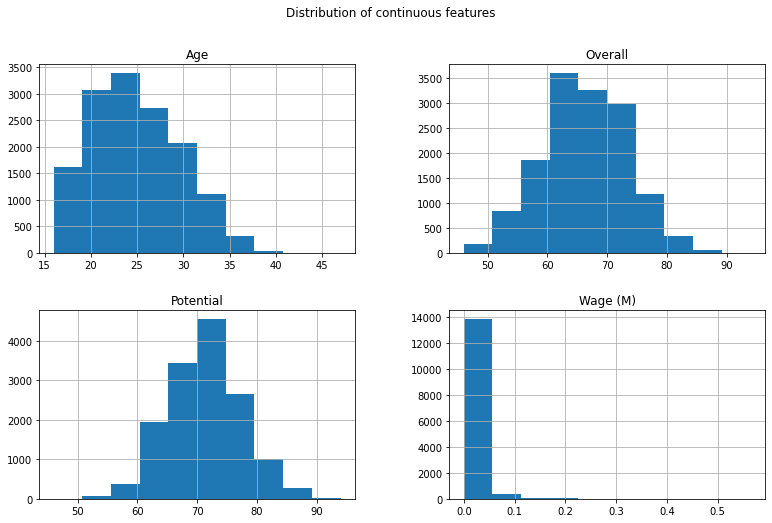

In [8]:
numerical_cols = X.select_dtypes(include=np.number).columns
X[numerical_cols].hist(figsize=(13, 8))
plt.suptitle('Distribution of continuous features')
plt.show()

***Insights:***
 - It seems Potential, Overall and Age have normally distributed.
 - Wage is positively skewed distribution.

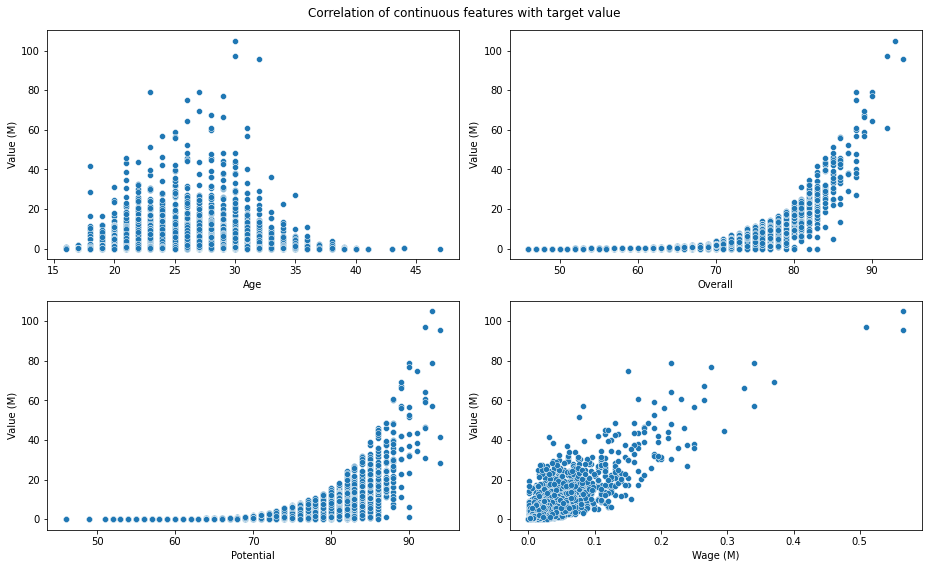

In [9]:
# scatter_matrix(X[numerical_cols], figsize=(20, 15));
fig, ax = plt.subplots(2, 2, figsize=(13, 8))
ax = ax.flatten()

for i, icol in enumerate(numerical_cols):
    #ax[i].scatter(X[icol], y)
    sns.scatterplot(data=df, x=df[icol], y=y, ax=ax[i])

plt.suptitle('Correlation of continuous features with target value')
plt.tight_layout()
plt.show()

***Insights:***
 - It seems Potential, Overall and Wage have strong positive correlation with Value.
 - Age doesn't seem to have strong correlation with Value.

#### 2. Categorical Features

In [10]:
categorical_cols = X.select_dtypes(exclude=np.number).columns
categorical_cols

Index(['Name', 'Nationality', 'Club', 'Position'], dtype='object')

In [11]:
X['Position'].value_counts()

CB     2139
ST     1823
GK     1612
CM     1568
RM     1108
CDM    1099
LM     1090
LB     1051
RB      953
CAM     869
RW      345
LW      340
CF      166
LWB      94
RWB      94
Name: Position, dtype: int64

In [12]:
# Droping name, nationality, club and position columns
X.drop(categorical_cols, axis=1, inplace=True)
X.head()

,Age,Overall,Potential,Wage (M)
0,25,54,58,0.001
1,21,64,73,0.010
2,21,72,79,0.013
3,21,57,66,0.002
4,19,63,75,0.002


### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape)

(11480, 4) (2871, 4)


#### Feature Scaling

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
print(X_train.shape, X_val.shape)

(11480, 4) (2871, 4)


#### Generate Polynomial Features

In [15]:
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_val = poly.fit_transform(X_val)

In [16]:
lr = LinearRegression() # Ridge()
lr.fit(X_train, y_train)

# #To retrieve the intercept:
# print(lr.intercept_)
# #For retrieving the slope:
# print(lr.coef_)
y_pred = lr.predict(X_val)
print(y_val.shape, y_pred.shape)

print('-----------R2 Score------------')
print(f'Training R2 score (LR): {r2_score(y_train, lr.predict(X_train))}')
print(f'Validation R2 Score (LR): {r2_score(y_val, y_pred)}')

print('-----------MSE------------')
print(f'Training MSE (LR): {mean_squared_error(y_train, lr.predict(X_train))}')
print(f'Validation MSE (LR): {mean_squared_error(y_val, y_pred)}')

(2871,) (2871,)
-----------R2 Score------------
Training R2 score (LR): 0.9738892852554311
Validation R2 Score (LR): 0.9686356045622909
-----------MSE------------
Training MSE (LR): 0.6586824623044064
Validation MSE (LR): 0.8969785094660349


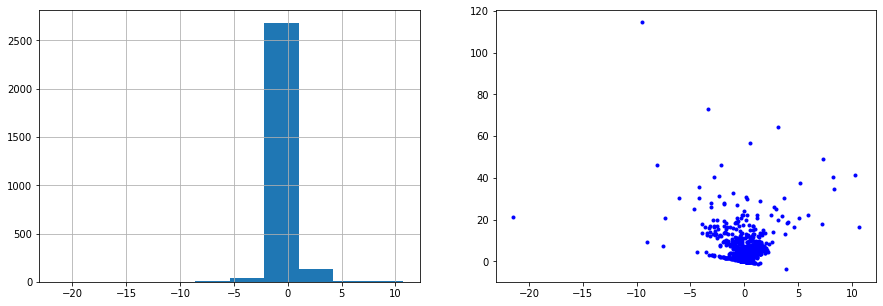

In [17]:
# Assumption-1 (LR): Residuals are normally distributed

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

resid = y_val - y_pred
resid.hist(ax=ax1)
ax2 = plt.plot(resid, y_pred, 'b.')
plt.show()

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [18]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,Name,Age,Nationality,Overall,Potential,Club,Wage (M),Position
0,280,C. Vela,28,Mexico,82,82,Real Sociedad,0.046,ST
1,569,J. Stones,23,England,79,85,Manchester City,0.105,CB
2,8731,V. Vermeij,22,Netherlands,67,74,Heracles Almelo,0.007,ST
3,10085,G. Omae,27,Japan,65,65,Omiya Ardija,0.002,CAM
4,9831,N. Miatke,27,Germany,66,67,FSV Zwickau,0.001,LM


In [19]:
drop_cols = categorical_cols.tolist()
drop_cols.append('Id')
print(drop_cols)

['Name', 'Nationality', 'Club', 'Position', 'Id']


In [20]:
# Transform and make predictions on test data

X_test = df_test.drop(drop_cols, axis=1)
X_test = scaler.transform(X_test)
X_test = poly.fit_transform(X_test)

y_pred = lr.predict(X_test)
submission = pd.DataFrame({'Id':df_test['Id'], 'Value (M)': y_pred})
submission.head()

,Id,Value (M)
0,280,19.772715
1,569,17.674058
2,8731,1.097412
3,10085,0.426658
4,9831,0.537472


In [21]:
submission.to_csv('submission.csv', index=False)